## Гауссово распределение, линейный дискриминантный анализ и наивный байес

### 1. Многомерное гауссово распределение
Создайте случайную выборку данных с двумерным гауссовым распределением. Для этого сперва сделайте два вектора из двух одномерных распределений с разными стандартными отклонениями $\sigma_1$ и $\sigma_2$, как показано ниже:  
``` python
import numpy as np

M = 200
sigma1 = 0.1
sigma2 = 0.5
x1 = np.random.randn(M, 1) * sigma1
x2 = np.random.randn(M, 1) * sigma2
X = np.concatenate((x1, x2), axis=1)
```
После чего сделайте матрицу поворота на угол $\alpha$ и с помощью неё поверните набор точек в пространстве.  
Посчитайте матрицу ковариации для сгенерированных точек.  
Нарисуйте полученное облако точек и сравните его с облаком точек, полученных с помощью готовой функции:  `np.random.multivariate_normal()`


C:\Users\Миша\AppData\Local\Temp\ipykernel_15140\106731079.py:21: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X_multivariate = np.random.multivariate_normal(mean, cov_matrix, M)


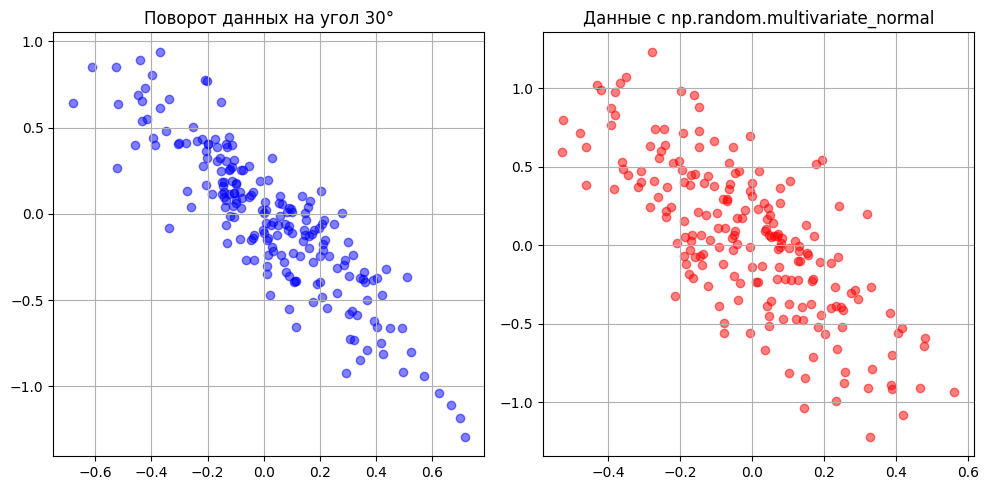

Ковариационная матрица после поворота:
[[ 0.06837401 -0.0970924 ]
 [-0.0970924   0.17683042]]

Ковариационная матрица для np.random.multivariate_normal:
[[ 0.04863798 -0.08109603]
 [-0.08109603  0.239153  ]]


In [8]:
import numpy as np
import matplotlib.pyplot as plt

M = 200
sigma1 = 0.1
sigma2 = 0.5
x1 = np.random.randn(M, 1) * sigma1
x2 = np.random.randn(M, 1) * sigma2
X = np.concatenate((x1, x2), axis=1)
#создаем матрицу наклона
alpha = np.radians(30)
rotation_matrix = np.array([[np.cos(alpha), -np.sin(alpha)], 
                            [np.sin(alpha), np.cos(alpha)]])
X_rotated = X @ rotation_matrix.T
#матрица ковариации
cov_matrix_rotated = np.cov(X_rotated, rowvar=False)
# np.random.multivariate_normal()
mean = [0, 0]
#здесь я не понял как указать значаения cov(x1,x2) и cov(x2,x1), поэтому указал значения -0.09, чтобы графики были похожи 
cov_matrix = [[sigma1**2, -0.09], [-0.09, sigma2**2]]
X_multivariate = np.random.multivariate_normal(mean, cov_matrix, M)
#график
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_rotated[:, 0], X_rotated[:, 1], color='blue', alpha=0.5)
plt.title('Поворот данных на угол 30°')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X_multivariate[:, 0], X_multivariate[:, 1], color='red', alpha=0.5)
plt.title('Данные с np.random.multivariate_normal')
plt.grid(True)

plt.tight_layout()
plt.show()

print("Ковариационная матрица после поворота:")
print(cov_matrix_rotated)

print("\nКовариационная матрица для np.random.multivariate_normal:")
print(np.cov(X_multivariate, rowvar=False))

### 2. Плотность вероятности гауссового распределения
В общем виде $n$-мерное гауссово распределение имеет вид:  
$$p(x) = \frac{1}{(\sqrt{2\pi})^n \sqrt{detC}} e^{-\frac{1}{2}(x-\mu)^TС^{-1}(x-\mu)} \tag{1}$$  
где $x\in{R^n}$, $\mu\in{R^n}$ - среднее значение, $C$ - матрица ковариации.  

Сгенерируйте набор точек в двумерном пространстве (как делали в пункте 1 или другим способом). Посчитайте для них среднее значение и матрицу ковариации $\mu$ и $C$. Для оценки плотности вероятности (probability density function - `pdf`) гауссового распределения в произвольной точке используйте `scipy.stats.multivariate_normal` 
(https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html), либо можете посчитать вручную.  

Визуализируйте набор точек и плотность вероятности, для чего изобразите точки одним цветом, а фон раскрасьте в соответсвии с плотностью вероятности, для чего можете использовать пример ниже:  

``` python
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal

xx = np.linspace(-1, 1, 100)
yy = np.linspace(-1, 1, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)
m = multivariate_normal(mean=[0,0], cov=[[0.3, 0], [0, 0.1]])
ZZ = m.pdf(pp).reshape(XX.shape)

IMG = plt.pcolor(XX, YY, ZZ)
plt.colorbar(IMG)

CS = plt.contour(XX, YY, m.pdf(pp).reshape(XX.shape), levels=[0.2, 0.4, 0.6, 0.8, 0.9], colors='k')
plt.clabel(CS, inline=1, fontsize=10)
```

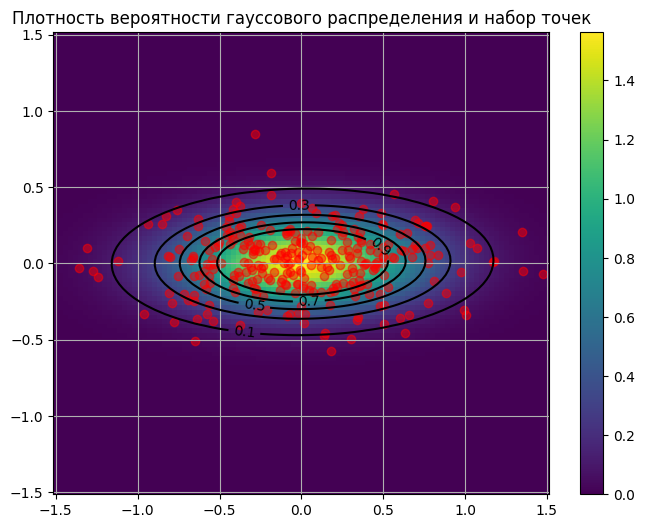

Среднее значение:
[0.00761899 0.00873101]
Ковариационная матрица:
[[0.24724015 0.00260551]
 [0.00260551 0.04192412]]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

M = 300
sigma1 = 0.5
sigma2 = 0.2
x1 = np.random.randn(M, 1) * sigma1
x2 = np.random.randn(M, 1) * sigma2
X = np.concatenate((x1, x2), axis=1)
#ср.знач и ков.матрица
mu = np.mean(X, axis=0)
cov_matrix = np.cov(X, rowvar=False)

xx = np.linspace(-1.5, 1.5, 100)
yy = np.linspace(-1.5, 1.5, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)

mvn = multivariate_normal(mean=mu, cov=cov_matrix)
ZZ = mvn.pdf(pp).reshape(XX.shape)

plt.figure(figsize=(8, 6))

IMG = plt.pcolor(XX, YY, ZZ, shading='auto', cmap='viridis')
plt.colorbar(IMG)

CS = plt.contour(XX, YY, ZZ, levels=[0.1, 0.3, 0.5, 0.7, 0.9], colors='k')
plt.clabel(CS, inline=1, fontsize=10)

plt.scatter(X[:, 0], X[:, 1], color='red', alpha=0.5)
plt.title('Плотность вероятности гауссового распределения и набор точек')
plt.grid(True)
plt.show()

print(f"Среднее значение:\n{mu}")
print(f"Ковариационная матрица:\n{cov_matrix}")

### 3. Бинарная классификация

**Задание** 
Создайте случайный датасет, состоящий из двух классов $y\in{\{0, 1\}}$, а признаки имеют две координаты. Посчитайте для каждого класса среднее значение и матрицу ковариации $\mu_0, \mu_1$ и $C_0, C_1$.

Решение задачи классификации можно свести к оценке максимальной апостериорной вероятности (Maximum a posterior - MAP):
$$y = \underset{y\in{0,1}}{argmax} p(y|x) \tag{2}$$  
которая в свою очередь через теорему Байеса равна:  
$$p(y|x) = \frac{p(x|y)p(y)}{p(x)} \tag{3}$$
В последней формуле вероятность p(y) называется априорной и не зависит от $x$ - оценить её можно просто как долю точек датасета принадлежащего заданному классу $y$. Вероятность p(x|y) называют правдоподобием (likelyhood). Обычно правдоподобие моделируется некоторой генерирующей моделью, например по формуле гаусса (1), и говорит насколько правдоподобно что точка с координатами $x$ могла быть "сгенерирована" в классе $y$. Знаменатель $p(x)$ в последней формуле не зависит от $y$, поэтому на него внимание не обращаем.  

Таким образом, для бинарной классификации, т.е. для оценки принадлежности некоторой точки $x$ к классу 0 или 1, нужно сравнить две величины:  
$$p(x|y=0)p(y=0) \overset{?}{<>} p(x|y=1)p(y=1) \tag{4}$$

**Задание**
Визуализируейте на одном рисунке датасет с точками обоих классов разными цветами. Раскрасьте фон изображения в соответствии с разностью левой и правой частей уравнения (4). Постройте на этом же рисунке разделяющую кривую, т.е. кривую соответствующую нулевой разнице между левой и правой частями. Для её построения используйте функции `plt.contour` с указанием конкретного уровня.

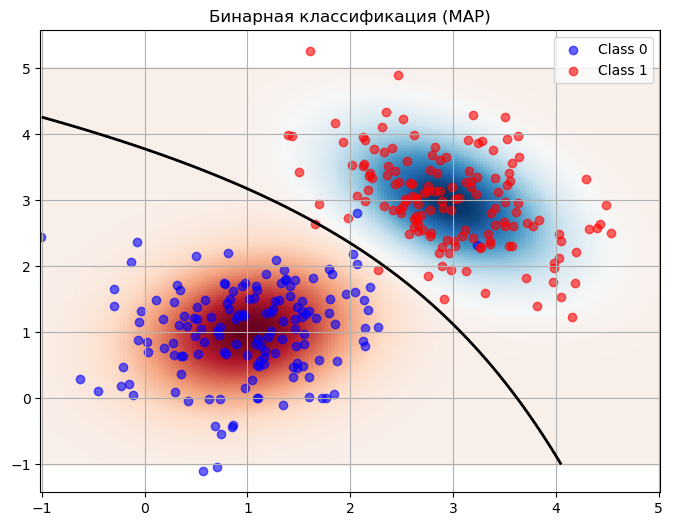

Среднее значение для класса 0:
[1.00838618 1.02892533]
Ковариационная матрица для класса 0:
[[0.47521339 0.080214  ]
 [0.080214   0.48909872]]

Среднее значение для класса 1:
[2.97112546 2.98590616]
Ковариационная матрица для класса 1:
[[ 0.45604834 -0.21503305]
 [-0.21503305  0.49436361]]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

np.random.seed(42)
M = 300
mean0 = [1, 1]
cov0 = [[0.5, 0.1], [0.1, 0.5]]
X0 = np.random.multivariate_normal(mean0, cov0, M//2)
y0 = np.zeros(M//2)

mean1 = [3, 3]
cov1 = [[0.5, -0.2], [-0.2, 0.5]]
X1 = np.random.multivariate_normal(mean1, cov1, M//2)
y1 = np.ones(M//2)

X = np.vstack((X0, X1))
y = np.hstack((y0, y1))
#матрица ковариации и сред. значение
mu0 = np.mean(X0, axis=0)
cov0 = np.cov(X0, rowvar=False)

mu1 = np.mean(X1, axis=0)
cov1 = np.cov(X1, rowvar=False)

prior0 = len(y0) / M
prior1 = len(y1) / M

xx, yy = np.meshgrid(np.linspace(-1, 5, 200), np.linspace(-1, 5, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

likelyhood0 = multivariate_normal(mean=mu0, cov=cov0).pdf(grid).reshape(xx.shape)
likelyhood1 = multivariate_normal(mean=mu1, cov=cov1).pdf(grid).reshape(xx.shape)

posterior0 = likelihood0 * prior0
posterior1 = likelihood1 * prior1

decision_map = posterior1 - posterior0

plt.figure(figsize=(8, 6))
plt.pcolor(xx, yy, decision_map, cmap='RdBu', shading='auto')
plt.contour(xx, yy, decision_map, levels=[0], colors='k', linewidths=2)
plt.scatter(X0[:, 0], X0[:, 1], color='blue', label='Class 0', alpha=0.6)
plt.scatter(X1[:, 0], X1[:, 1], color='red', label='Class 1', alpha=0.6)
plt.title('Бинарная классификация (MAP)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Среднее значение для класса 0:\n{mu0}")
print(f"Ковариационная матрица для класса 0:\n{cov0}\n")
print(f"Среднее значение для класса 1:\n{mu1}")
print(f"Ковариационная матрица для класса 1:\n{cov1}")

### 4. LDA (linear discriminant analysis)

**Задание** Рассмотрите частный случай, когда для точек двух классов матрицы ковариации совпадают, т.е. $C_0=C_1$, но средние значения отличаются $\mu_0\neq\mu_1$. Выпишите явное выражение для разделяющей поверхности в этом случае. Визуализируйте такой случай аналогично предыдущему пункту. Про линейный и квадратичный дискриминантный анализ можете почитать здесь (https://scikit-learn.org/stable/modules/lda_qda.html) или в учебнике Яндекса по ML (https://education.yandex.ru/handbook/ml/article/generativnyj-podhod-k-klassifikacii)

Реализуйте классификатор на основе метода линейного дискриминантного анализа по шаблону ниже. Данный алгоритм предполагает одинаковость матриц ковариации (т.е. считает одну общую матрицу ковариации, но разные средние) и использует линейное правило классификации. Желательно сделать реализацию, которая подходит не только для двумерного, но и для более общего случая.

```python
from sklearn.base import BaseEstimator

class myLDA(BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        pass
```


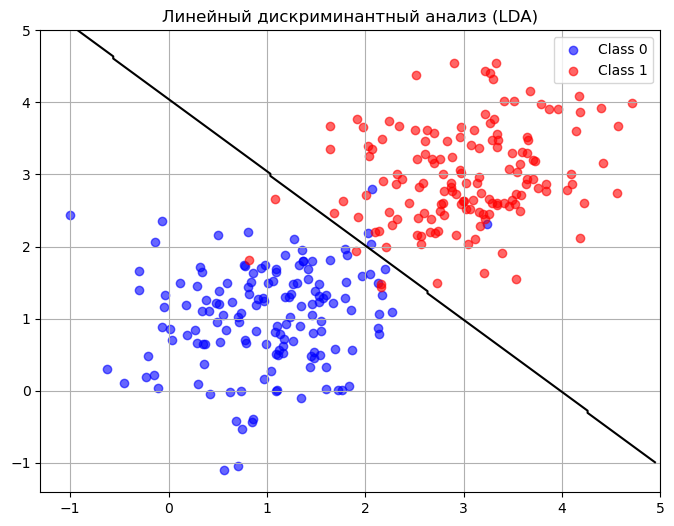

Средние значения:
[1.00838618 1.02892533] (Class 0)
[3.01796567 2.96835006] (Class 1)
Ковариационная матрица:
[[1.49384494 1.07856805]
 [1.07856805 1.41086051]]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator

class myLDA(BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mu = {}
        self.cov = np.cov(X, rowvar=False)
        
        for cls in self.classes:
            self.mu[cls] = np.mean(X[y == cls], axis=0)
        
        self.prior = {cls: np.mean(y == cls) for cls in self.classes}
        
        self.coef_ = np.linalg.inv(self.cov) @ (self.mu[1] - self.mu[0])
        self.intercept_ = 0.5 * (self.mu[0].T @ np.linalg.inv(self.cov) @ self.mu[0] - 
                                 self.mu[1].T @ np.linalg.inv(self.cov) @ self.mu[1]) + \
                                 np.log(self.prior[1] / self.prior[0])
        
    def predict(self, X):
        decision = X @ self.coef_ + self.intercept_
        return np.where(decision > 0, 1, 0)

np.random.seed(42)
M = 300
mean0 = [1, 1]
mean1 = [3, 3]
cov = [[0.5, 0.1], [0.1, 0.5]]
X0 = np.random.multivariate_normal(mean0, cov, M//2)
y0 = np.zeros(M//2)

X1 = np.random.multivariate_normal(mean1, cov, M//2)
y1 = np.ones(M//2)

X = np.vstack((X0, X1))
y = np.hstack((y0, y1))

lda = myLDA()
lda.fit(X, y)

plt.figure(figsize=(8, 6))
plt.scatter(X0[:, 0], X0[:, 1], color='blue', label='Class 0', alpha=0.6)
plt.scatter(X1[:, 0], X1[:, 1], color='red', label='Class 1', alpha=0.6)

xx, yy = np.meshgrid(np.linspace(-1, 5, 200), np.linspace(-1, 5, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

Z = lda.predict(grid).reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0.5], colors='k')

plt.title('Линейный дискриминантный анализ (LDA)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Средние значения:\n{lda.mu[0]} (Class 0)\n{lda.mu[1]} (Class 1)")
print(f"Ковариационная матрица:\n{lda.cov}")


### 5. Наивный байесовый классификатор (NaiveBayes)

**Задание** 
Прочитать по наивный байесовый подход можно здесь (https://scikit-learn.org/stable/modules/naive_bayes.html) или в учебнике Яндекса по ML (https://education.yandex.ru/handbook/ml/article/generativnyj-podhod-k-klassifikacii).  

Суть наивного предположения состоит в том, чтобы не считать совместную плотность вероятности для $n$-мерного случая, а рассматривать каждую переменную как независимую и считать одномерные распределения:  
$$p(x_1,x_2,...,x_n|y) => \prod\limits_{i=1}^{n}p(x_i|y)$$  
Это можно также рассматривать как обнуление всех внедиагональных элементов матрицы ковариации.  

**Задание** 
Реализуйте классификатор на основе наивного байесового подхода с одномерным гауссовым распределением для каждой переменной. Желательно сделать реализацию, которая подходит не только для двумерного, но и для более общего случая.

```python
from sklearn.base import BaseEstimator

class myNB(BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        pass
```

Точность классификатора: 0.98


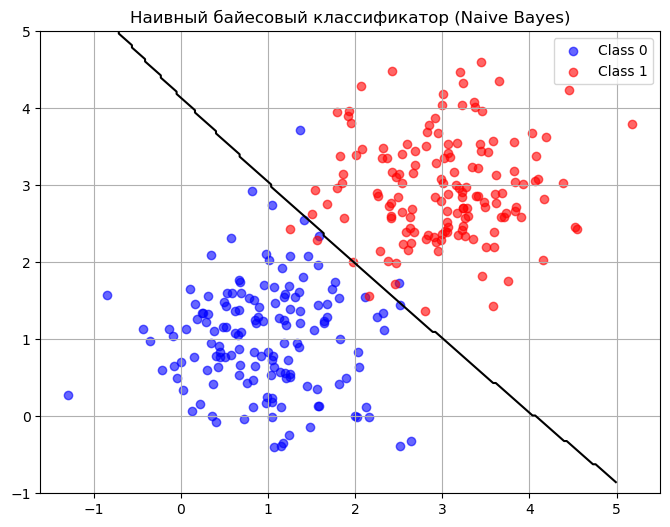

Средние значения:
[0.97591553 1.01623762] (Class 0)
[3.00883316 2.96077542] (Class 1)
Дисперсии:
[0.46551743 0.49907806] (Class 0)
[0.48974103 0.43073073] (Class 1)


In [5]:
import numpy as np
from sklearn.base import BaseEstimator
import matplotlib.pyplot as plt

class myNB(BaseEstimator):
    def __init__(self):
        self.mu = {}
        self.var = {}
        self.prior = {}

    def fit(self, X, y):
        self.classes = np.unique(y)
        n_samples, n_features = X.shape

        for cls in self.classes:
            X_cls = X[y == cls]
            self.mu[cls] = np.mean(X_cls, axis=0)
            self.var[cls] = np.var(X_cls, axis=0)
            self.prior[cls] = len(X_cls) / n_samples

    def predict(self, X):
        n_samples = X.shape[0]
        log_likelihood = np.zeros((n_samples, len(self.classes)))

        for index, cls in enumerate(self.classes):
            likelihood = -0.5 * np.sum(np.log(2 * np.pi * self.var[cls])) \
                         -0.5 * np.sum(((X - self.mu[cls]) ** 2) / self.var[cls], axis=1)
            log_likelihood[:, index] = likelihood + np.log(self.prior[cls])

        return self.classes[np.argmax(log_likelihood, axis=1)]

np.random.seed(42)
M = 300
mean0 = [1, 1]
mean1 = [3, 3]
cov = [[0.5, 0], [0, 0.5]]
X0 = np.random.multivariate_normal(mean0, cov, M//2)
y0 = np.zeros(M//2)

X1 = np.random.multivariate_normal(mean1, cov, M//2)
y1 = np.ones(M//2)

X = np.vstack((X0, X1))
y = np.hstack((y0, y1))

nb = myNB()
nb.fit(X, y)

predictions = nb.predict(X)

accuracy = np.mean(predictions == y)
print(f"Точность классификатора: {accuracy:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(X0[:, 0], X0[:, 1], color='blue', label='Class 0', alpha=0.6)
plt.scatter(X1[:, 0], X1[:, 1], color='red', label='Class 1', alpha=0.6)

xx, yy = np.meshgrid(np.linspace(-1, 5, 200), np.linspace(-1, 5, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

Z = nb.predict(grid).reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0.5], colors='k')

plt.title('Наивный байесовый классификатор (Naive Bayes)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Средние значения:\n{nb.mu[0]} (Class 0)\n{nb.mu[1]} (Class 1)")
print(f"Дисперсии:\n{nb.var[0]} (Class 0)\n{nb.var[1]} (Class 1)")

### 6. Сравнение двух алгоритмов: LDA и NB

Создайте датасет для бинарной классификации, либо вручную либо используйте функцию `sklearn.datasets.make_classification`
(https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)  

Разделите датасет на обучающую и тестовую подвыборки.  
Проверьте работоспособность разработанных вами двух алгоритмов.  
Посчитайте основные метрики классификации: долю правильных ответов (accuracy), точность (Precision) и полноту (Recall).  
(про метрики прочитайте здесь https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii)  
Сделайте выводы.  

In [6]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.base import BaseEstimator

class myLDA(BaseEstimator):
    def __init__(self):
        self.mu = {}
        self.var = {}
        self.prior = {}

    def fit(self, X, y):
        self.classes = np.unique(y)
        n_samples, n_features = X.shape
        for cls in self.classes:
            X_cls = X[y == cls]
            self.mu[cls] = np.mean(X_cls, axis=0)
            self.var[cls] = np.var(X_cls, axis=0)
            self.prior[cls] = len(X_cls) / n_samples

    def predict(self, X):
        n_samples = X.shape[0]
        log_likelihood = np.zeros((n_samples, len(self.classes)))
        for index, cls in enumerate(self.classes):
            likelihood = -0.5 * np.sum(np.log(2 * np.pi * self.var[cls])) \
                         -0.5 * np.sum(((X - self.mu[cls]) ** 2) / self.var[cls], axis=1)
            log_likelihood[:, index] = likelihood + np.log(self.prior[cls])
        return self.classes[np.argmax(log_likelihood, axis=1)]

class myNB(BaseEstimator):
    def __init__(self):
        self.mu = {}
        self.var = {}
        self.prior = {}

    def fit(self, X, y):
        self.classes = np.unique(y)
        n_samples, n_features = X.shape
        for cls in self.classes:
            X_cls = X[y == cls]
            self.mu[cls] = np.mean(X_cls, axis=0)
            self.var[cls] = np.var(X_cls, axis=0)
            self.prior[cls] = len(X_cls) / n_samples

    def predict(self, X):
        n_samples = X.shape[0]
        log_likelihood = np.zeros((n_samples, len(self.classes)))
        for index, cls in enumerate(self.classes):
            likelihood = -0.5 * np.sum(np.log(2 * np.pi * self.var[cls])) \
                         -0.5 * np.sum(((X - self.mu[cls]) ** 2) / self.var[cls], axis=1)
            log_likelihood[:, index] = likelihood + np.log(self.prior[cls])
        return self.classes[np.argmax(log_likelihood, axis=1)]

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lda = myLDA()
nb = myNB()

lda.fit(X_train, y_train)
nb.fit(X_train, y_train)

lda_predictions = lda.predict(X_test)
nb_predictions = nb.predict(X_test)

lda_accuracy = accuracy_score(y_test, lda_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)

lda_precision = precision_score(y_test, lda_predictions)
nb_precision = precision_score(y_test, nb_predictions)

lda_recall = recall_score(y_test, lda_predictions)
nb_recall = recall_score(y_test, nb_predictions)

print(f"LDA Точность: {lda_accuracy:.2f}, Точность: {lda_precision:.2f}, Полнота: {lda_recall:.2f}")
print(f"Наивный Байес Точность: {nb_accuracy:.2f}, Точность: {nb_precision:.2f}, Полнота: {nb_recall:.2f}")

LDA Точность: 0.87, Точность: 0.92, Полнота: 0.81
Наивный Байес Точность: 0.87, Точность: 0.92, Полнота: 0.81
